## the point of this project is to classify the 10 digits (0,1...9) from the MNIST dataset.
subsmapled images will be used (scaled imaged)
1. Get the images

1. Resize them if necessary
1. Display them to check that it is doable :)
1. Assign 1 if the number is 2, 0 otherwise.
1. Add the bias
1. Create the w vector of weights
1. for each number (j) in the sample set
    1. compute f(w.xj)=yj
    1. update weight : w(t+1) = wi(t) + (dj - yj(t))xji
    
1. simplify code => use cell ?
1. Improve algorithm to test for each digit 0..9 and decide which is what according to score.
    - use a vector of size 10, with all zeros except the desired digit at 1.
    

    

Get the images


In [17]:
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.misc

%matplotlib inline

mndata = MNIST('./data')
images, labels = mndata.load_training()

60000
60000


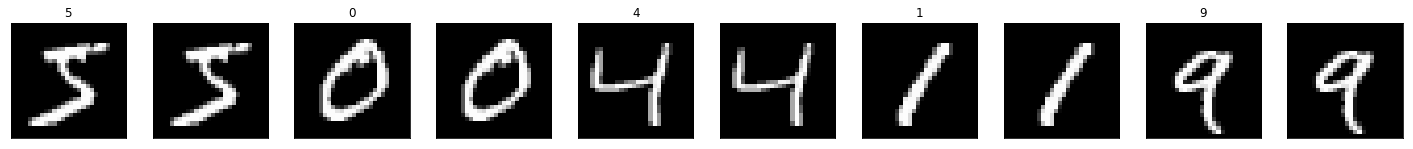

In [18]:
datasetsize = 60000
images = images[0:datasetsize]
labels = labels[0:datasetsize]
print(len(labels))
print(len(images))

digitsize = 28

# convert into an array of array of pixel.
images = np.array(images).reshape(len(images),28,28)


# Scale image
img_scaled = []
for n in range(len(images)):
    displayimg = sp.misc.imresize(images[n], (digitsize,digitsize)) # values are ranging from 0 to 255
    displayimg = displayimg.reshape(digitsize*digitsize) # reshape the 2x2 array into a simple pixel vector
    img_scaled.append(displayimg)

# Plot the training dataset
plt.gray()
fig = plt.figure(figsize=(25,25))
for n in range(5):
    a = plt.subplot(10,10,(n*2)+1)
    plt.title(labels[n])

    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(images[n])
    #print(displayimg)
    a = plt.subplot(10,10,(n*2)+2)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(img_scaled[n].reshape(digitsize,digitsize))

In [19]:
# set values in the [0;1] interval instead of [0;255]
img_scaled = np.array(img_scaled)/255
labels = np.array(labels).reshape(len(labels), 1)

#Process labels.
# create a vector out of a digit. For instance 3 = [0,0,0,1,0...]
vect_labels = []
for n in range(len(labels)):
    vect = np.zeros(10)
    vect[labels[n]] = 1
    vect_labels.append(vect)

vect_labels = np.array(vect_labels).reshape(len(labels), 10)

# create weights vector
vect_w = np.ones((10,digitsize**2+1))
# alternative is : 
# vect_w = np.random.rand(10,digitsize**2+1)
    
digits = np.insert(img_scaled, 0, 1, axis=1) # insert 1s in 0th columns of each row (bias)
#print(img_scaled[0])
#print(img_scaled[1])
#print(img_scaled[0])
#print(img_scaled[1])

steps = 50
t = 0
delta = 100
worst_improvment = 1
epsilon = 0.0002

prev_delta = np.ones((10,1))
while t < steps and worst_improvment > epsilon:
    print('len(digits)', len(digits))
    for j in range(len(digits)):
        
    #for lab in range(10):
        '''
        y = np.dot(vect_w[lab],digits[j])/(digitsize**2+1)
        delta = vect_labels[j][lab] - y
        #print("delta:\n", delta )
        inc = digits[j] * delta
        #print("inc : ", inc)
        vect_w[lab] = vect_w[lab] + inc
        '''
        y = np.dot(vect_w,digits[j])/(digitsize**2+1)
        delta = (vect_labels[j] - y) / 10 #len(digits)
        delta = delta.reshape(10,1)
        #print("delta:\n", delta )
        inc = digits[j] * delta
        #print("inc : ", inc)

        #vect_w[lab] = vect_w[lab] + inc
        vect_w = vect_w + inc
        #print('vect_w : ', vect_w)

        ##if j==0:
        ##    print('\r time t={} digit={}, y={}, delta= {}'.format(t, j, y, delta))
        #print('New weights are : {}'.format(vect_w))
    t += 1  
    improvment = abs(delta-prev_delta)
    worst_improvment = np.max(improvment)
    print("step {} done, improvment = {} ".format(t,worst_improvment))
    prev_delta = delta
    
    
#get rid of bias weight
#print("len vect_w[0]: ", len(vect_w[i]))
#print("vect_w:",vect_w)
tmp_w = []
for i in range(10):
    val =  vect_w[i][1:]
    tmp_w.append(val)
    
vect_w = tmp_w
print("Done.")


len(digits) 60000
step 1 done, improvment = 1.0253358664051526 
len(digits) 60000
step 2 done, improvment = 0.005227735894705287 
len(digits) 60000
step 3 done, improvment = 0.00430997152527637 
len(digits) 60000
step 4 done, improvment = 0.0032113595120970076 
len(digits) 60000
step 5 done, improvment = 0.0024048121695724456 
len(digits) 60000
step 6 done, improvment = 0.0018270778834591217 
len(digits) 60000
step 7 done, improvment = 0.0014069931038474884 
len(digits) 60000
step 8 done, improvment = 0.0010960924255371887 
len(digits) 60000
step 9 done, improvment = 0.0008622537697363306 
len(digits) 60000
step 10 done, improvment = 0.0006837433328698919 
len(digits) 60000
step 11 done, improvment = 0.0005455496049559146 
len(digits) 60000
step 12 done, improvment = 0.0004371392887827785 
len(digits) 60000
step 13 done, improvment = 0.0003510265446418151 
len(digits) 60000
step 14 done, improvment = 0.0002818296473037704 
len(digits) 60000
step 15 done, improvment = 0.0002256355652284

### now use the weight found at the previous step to guess some digits...


In [20]:
mndata = MNIST('./data')
images_test, labels_test = mndata.load_testing()
print("Test set size is : {}".format(len(images_test)))

Test set size is : 10000


1000
1000
true_positive : 760
true_negative : 0
false_positive :  240
false_negative :  0
Accuracy : 76.0%


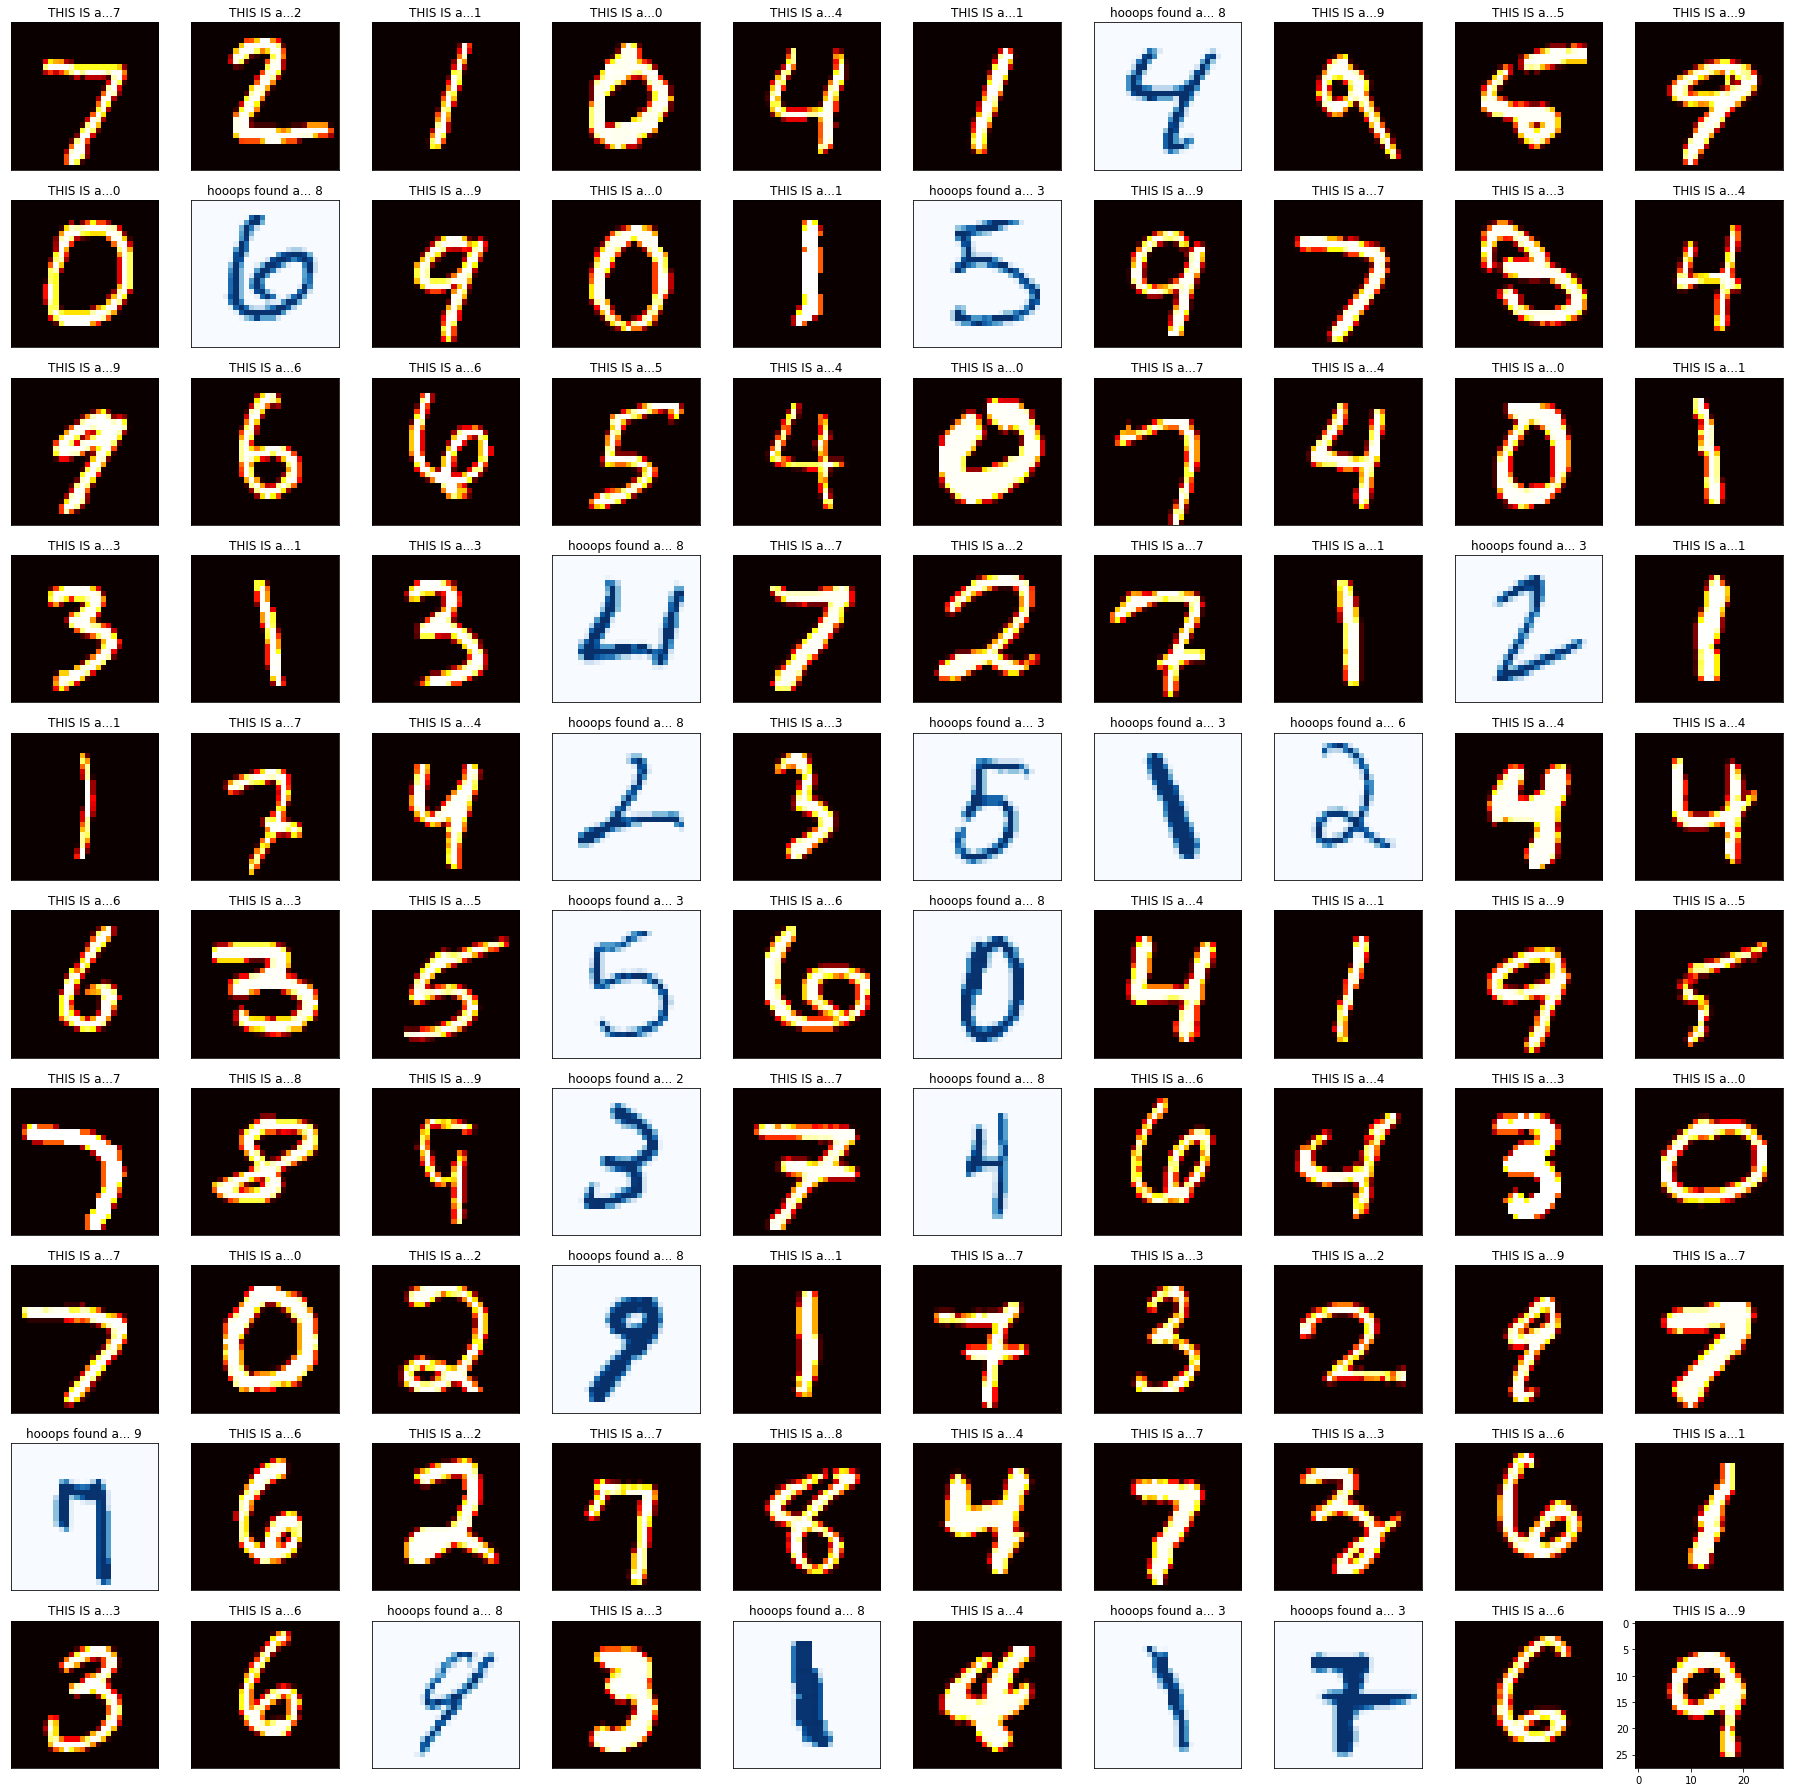

In [21]:
testsetsize = 1000
images_test = images_test[0:testsetsize]
labels_test = labels_test[0:testsetsize]

print(len(labels_test))
print(len(images_test))
#print(images[0])
img_test = np.array(images_test).reshape(len(images_test),28,28)

#print('w used is {}'.format(w))

plt.gray()
fig = plt.figure(figsize=(25,25))
img_scaled_test = []

# pre-init
for n in range(len(images_test)):
    displayimg_test = sp.misc.imresize(img_test[n], (digitsize,digitsize)) # values are ranging from 0 to 255
    displayimg_test = displayimg_test.reshape(digitsize*digitsize)

    img_scaled_test.append(displayimg_test)

img_scaled_test_norm = np.array(img_scaled_test)/255

true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

predicted_values = []

for n in range(testsetsize):
    value = []
    for lab in range(10):
        value.append(np.dot(vect_w[lab],img_scaled_test_norm[n])/digitsize**2)

    #print(value)
    predicted_value = np.argmax(value)
    predicted_values.append(predicted_value)
    #print("number is ", predicted_value)
    if labels_test[n] == predicted_value:
        true_positive += 1
    else:
        false_positive += 1
        
for n in range(100):
    
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    a = plt.subplot(10,10,n+1)
    plt.imshow(img_scaled_test[n].reshape(digitsize,digitsize))

    if predicted_values[n] == labels_test[n]:
        plt.title('THIS IS a...' + str(predicted_values[n]))
        plt.set_cmap('hot')
    else:
        plt.title('hooops found a... ' + str(predicted_values[n]))
        plt.set_cmap('Blues')

plt.tight_layout()

#print(img_scaled)
labels_test = np.array(labels_test).reshape(len(labels_test), 1)

print('true_positive :', true_positive)
print('true_negative :', true_negative)
print('false_positive : ', false_positive)
print('false_negative : ', false_negative)
print('Accuracy : {}%'.format(100*(true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)))

# plot the w vector
#for i in range(10):
#    wimg = vect_w[i].reshape(digitsize, digitsize)
#    plt.imshow(vect_w[i]*100)